In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#load
data = pd.read_csv("resources/cn7050data.csv",encoding='latin-1',names=["sentiment","text"])

data.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


sentiment    0
text         0
dtype: int64
sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64
<class 'pandas.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sentiment  4846 non-null   str  
 1   text       4846 non-null   str  
dtypes: str(2)
memory usage: 717.4 KB


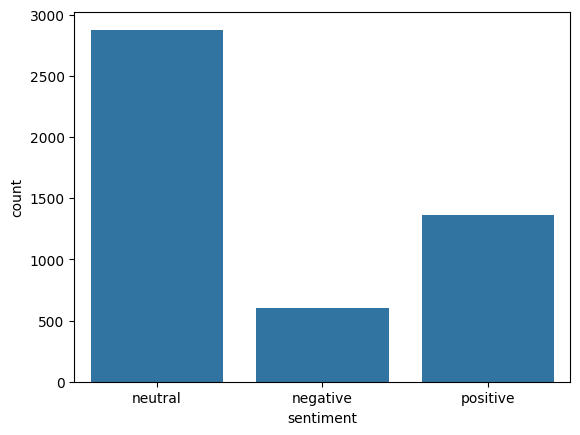

In [2]:
print(data.isnull().sum())
print(data.value_counts("sentiment"))
sns.countplot(x="sentiment",data=data)
data.info()

In [3]:
data.value_counts("sentiment")

sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

In [4]:
print("before removing duplicates:", data.shape)
print(data[data.duplicated(subset=["sentiment","text"],keep=False)])
data = data.drop_duplicates()
data=data.reset_index(drop=True)
print("after removing duplicates:", data.shape)
data[data.duplicated(subset=["sentiment","text"],keep=False)]

before removing duplicates: (4846, 2)
     sentiment                                               text
1098   neutral  The issuer is solely responsible for the conte...
1099   neutral  The issuer is solely responsible for the conte...
1415   neutral  The report profiles 614 companies including ma...
1416   neutral  The report profiles 614 companies including ma...
2395   neutral  Ahlstrom 's share is quoted on the NASDAQ OMX ...
2396   neutral  Ahlstrom 's share is quoted on the NASDAQ OMX ...
2566   neutral  SSH Communications Security Corporation is hea...
2567   neutral  SSH Communications Security Corporation is hea...
3093   neutral  Proha Plc ( Euronext :7327 ) announced today (...
3094   neutral  Proha Plc ( Euronext :7327 ) announced today (...
3205   neutral  The company serves customers in various indust...
3206   neutral  The company serves customers in various indust...
after removing duplicates: (4840, 2)


,sentiment,text


In [5]:
# lowercase all the text. probabely not needed but just to be sure
data['sentiment'] = data['sentiment'].str.lower()

# Sampling
**'stratify'** sampling to ensure each split has the same proportion of positive/negative/neutral labels.
neutral     2879
positive    1363
negative     604

we are going to use an 80% Train, 10% Validation, 10% Test split.

named: train / val/ test

In [6]:
train_df,temp_df = train_test_split(data, test_size=0.2, random_state=13,stratify=data["sentiment"])
val_df,test_df = train_test_split(temp_df, test_size=0.5, random_state=13,stratify=temp_df["sentiment"])

print(f"Training : {len(train_df)} rows")
print(f"Validation : {len(val_df)} rows")
print(f"Testing : {len(test_df)} rows")

Training : 3872 rows
Validation : 484 rows
Testing : 484 rows


## BERT Models Pipelines
We will use the hugging face transformers libraries to call :

1- ProsusAI/finbert

2- bert-base-uncased

In [7]:
from transformers import pipeline
import torch
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
from tqdm.auto import tqdm

test_texts=test_df["text"].tolist()
test_labels=test_df["sentiment"].tolist()

In [11]:
finbert_classifier=pipeline("text-classification", model="ProsusAI/finbert",device=-1)
finbert_preds_raw = [result['label'] for result in tqdm(finbert_classifier(test_texts, truncation=True, max_length=512))]

  0%|          | 0/484 [00:00<?, ?it/s]